In [2]:
# 1. Creating Dataframe from given CSV file
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

df = pd.read_csv('Iris.csv')
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [4]:
# 2. Printing number of rows and columns in dataframe
print("No.of rows = ", df.shape[0])
print("No.of Columns = ", df.shape[1])

No.of rows =  150
No.of Columns =  6


In [3]:
# 3. Printing names of columns in Dataframe
column_names = df.columns.to_list()
print(column_names)

['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


In [4]:
# 4. Printing datatypes of each column in Dataframe
data_types = df.dtypes.to_dict()
print(data_types)

{'Id': dtype('int64'), 'SepalLengthCm': dtype('float64'), 'SepalWidthCm': dtype('float64'), 'PetalLengthCm': dtype('float64'), 'PetalWidthCm': dtype('float64'), 'Species': dtype('O')}


In [5]:
# 5. Mean and variance of each column in Dataframe
mean = df.mean(numeric_only=True)
variance = df.var(numeric_only=True)
print("Mean:  \n", mean, '\n')
print("Variance: \n", variance)

Mean:  
 Id               75.500000
SepalLengthCm     5.843333
SepalWidthCm      3.054000
PetalLengthCm     3.758667
PetalWidthCm      1.198667
dtype: float64 

Variance: 
 Id               1887.500000
SepalLengthCm       0.685694
SepalWidthCm        0.188004
PetalLengthCm       3.113179
PetalWidthCm        0.582414
dtype: float64


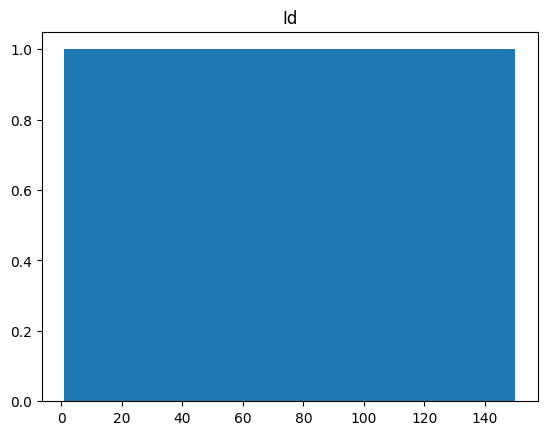

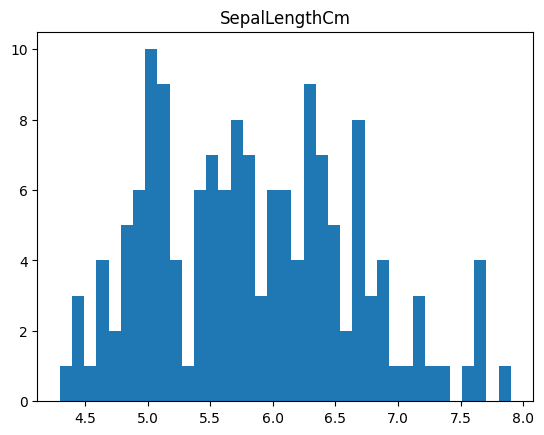

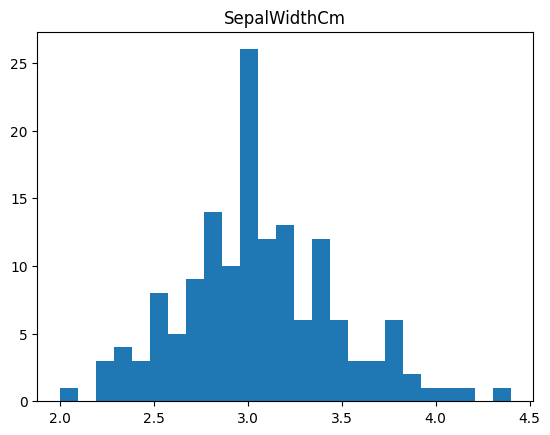

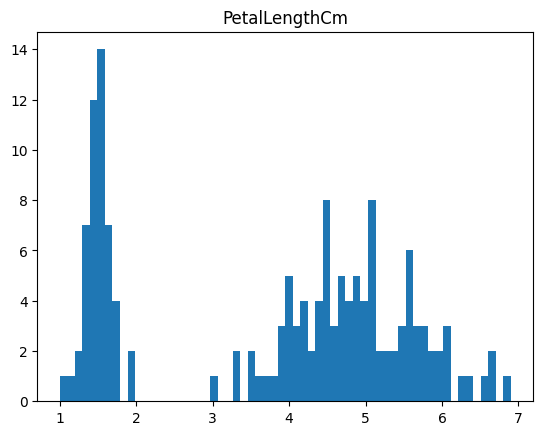

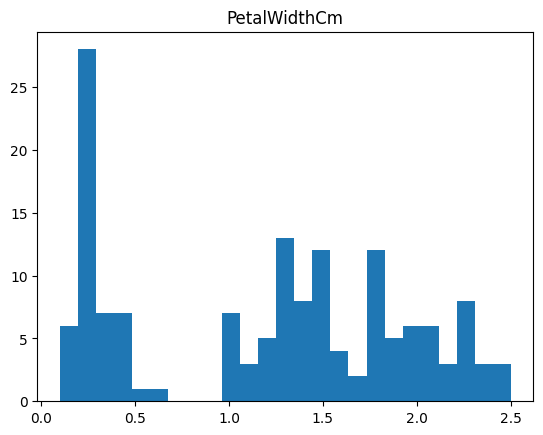

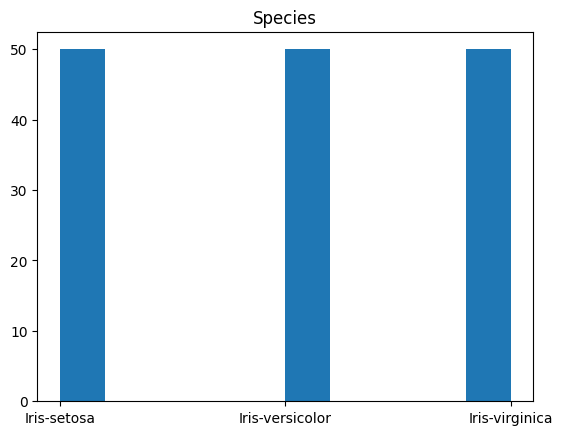

In [6]:
# 6. Plotting Histograms for each column in Dataframe using appropriate bins.
number_bins = {
    'Id' : 150,
    'SepalLengthCm' : 37,
    'SepalWidthCm' : 25,
    'PetalLengthCm' : 60,
    'PetalWidthCm' : 25,
    'Species' : 10
}
for col in column_names:
    plt.hist(df[col], bins=number_bins.get(col))
    plt.title(col)
    plt.show()

                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


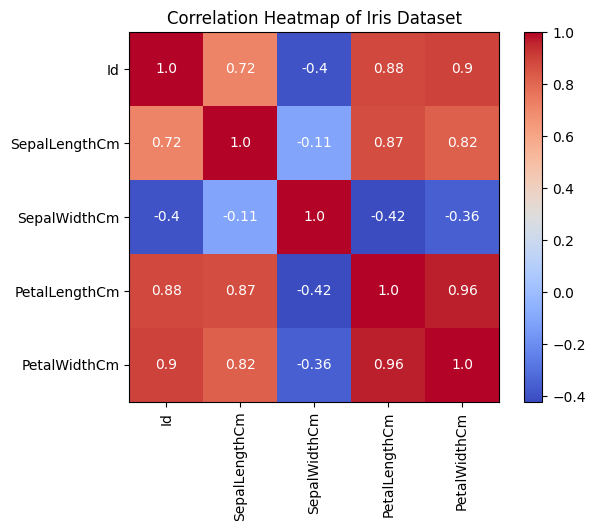

In [16]:
# 7. Correlation matrix and heatmap plot printing
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)
plt.imshow(corr_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap of Iris Dataset')
plt.colorbar()

plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.text(j, i, str(round(corr_matrix.iloc[i, j], 2)), ha='center', va='center', color='white')

plt.show()

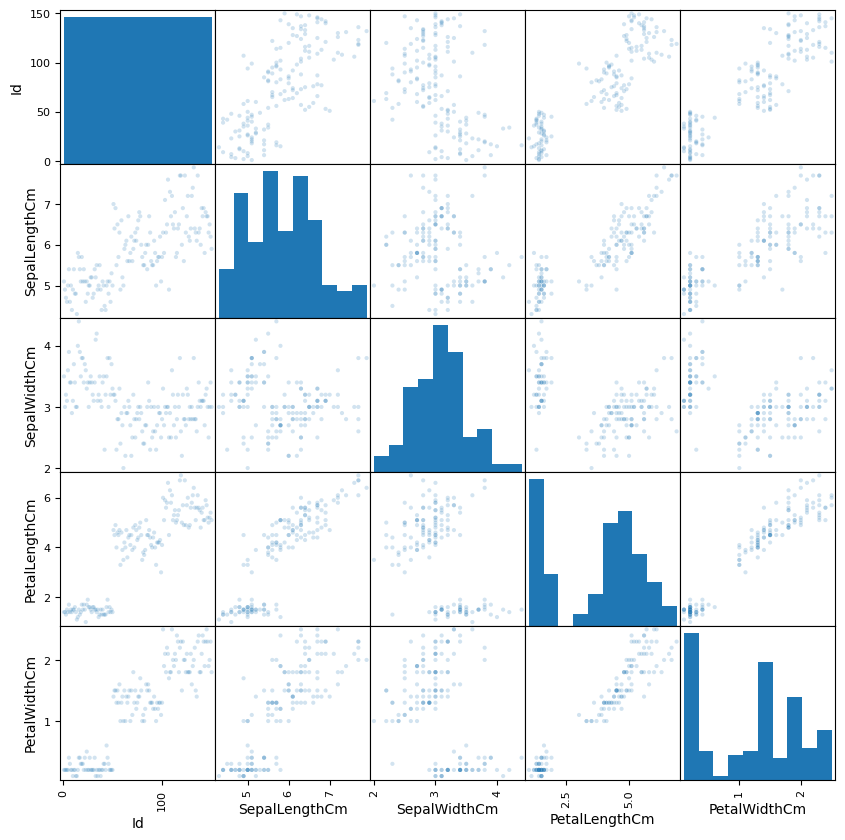

In [17]:
# 8. Plotting scatterplot between each pair of column_names
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(10, 10), diagonal='hist')
plt.show()
# The below code can also be used to plot scatter plots between any two columns but I have used scatter_matrix() in Pandas for easy checking.

# for i in range(len(column_names)):
#     for j in range(i + 1, len(column_names)):
#         x = df[column_names[i]]
#         y = df[column_names[j]]
#         plt.scatter(x, y)
#         plt.xlabel(column_names[i])
#         plt.ylabel(column_names[j])
#         plt.show()

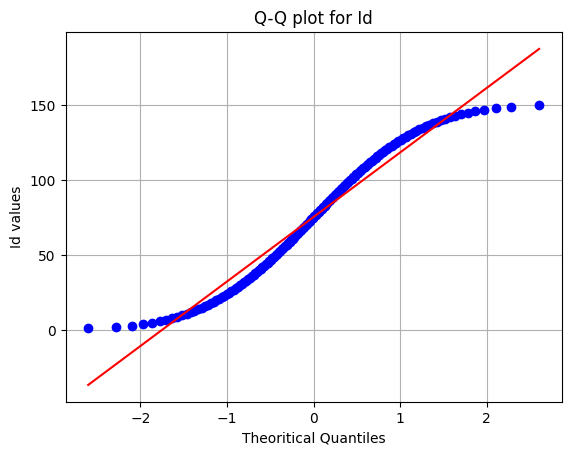

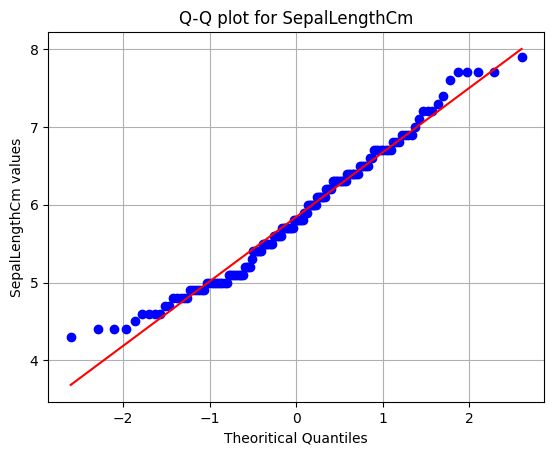

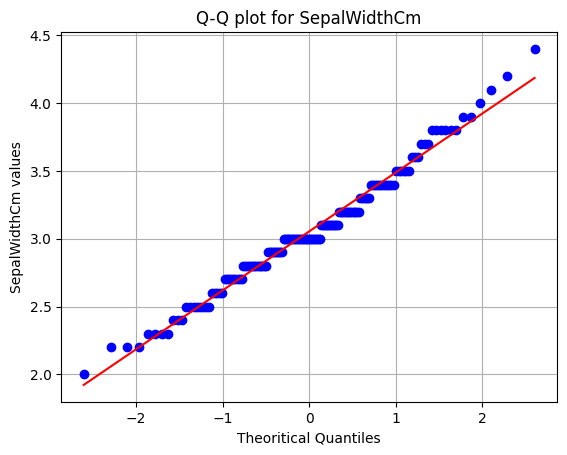

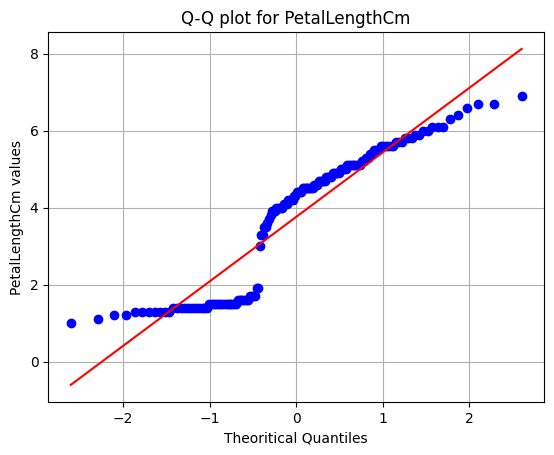

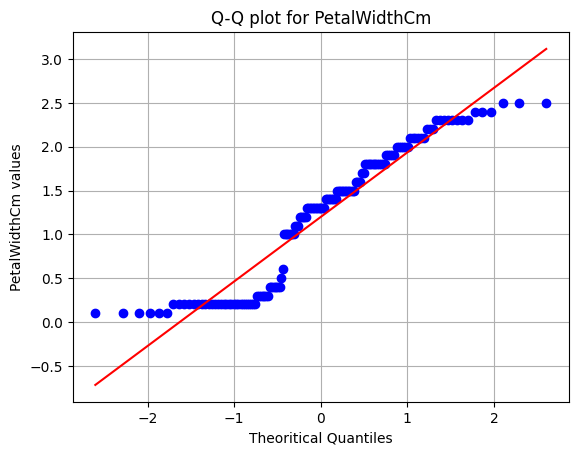

In [12]:

# 9. Plotting Q-Q plots for all columns except Species for above Dataframe
for col in column_names[:-1]:
    stats.probplot(df[col], dist='norm', plot=plt)
    plt.grid()
    plt.ylabel(col + ' values')
    plt.xlabel('Theoritical Quantiles')
    plt.title('Q-Q plot for ' + col)
    plt.show()

# The below commented code is for plotting Q-Q Plots using matplotlib library I have used scipy above for better Understanding of Q-Q plots.
# for col_name in column_names[:-1]:
#     data = df[col_name]
#     mu, sigma = data.mean(), data.std()
#     normal_data = np.random.normal(mu, sigma, len(data))
#     data_sorted = np.sort(data)
#     normal_sorted = np.sort(normal_data)
    
#     plt.scatter(normal_sorted, data_sorted)
#     plt.grid()
#     plt.xlabel('Normal Distribution')
#     plt.ylabel(col_name)
#     plt.title('Q-Q Plot of ' + col_name)
#     plt.show()

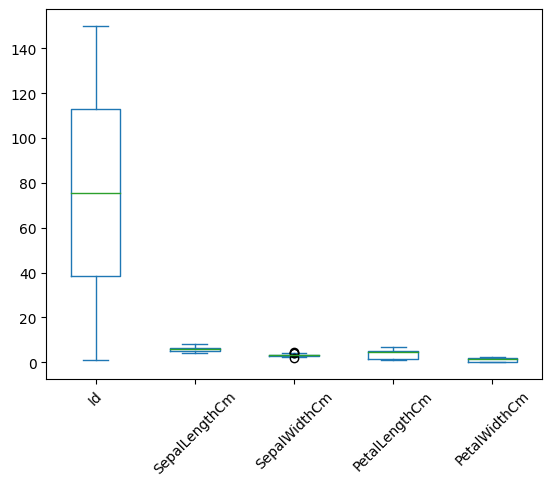

In [16]:
# 10. Box and whisker's plot for all columns of given Dataframe
df.plot(kind='box')
plt.xticks(rotation=45)
plt.show()